In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2023-03-15 17:44:30.221234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
img_array=cv2.imread("training/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

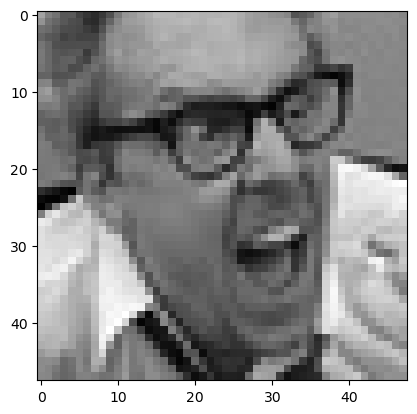

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory="training/"

In [6]:
Classes=["0","1","2","3","4","5","6"]

In [7]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))

In [8]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_Data=[]
def create_training_Data():
    for category in Classes:
     path=os.path.join(Datadirectory,category)
     class_num=Classes.index(category)
     for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_Data.append([new_array,class_num])

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

28709


In [13]:
import random
random.shuffle(training_Data)

In [14]:
X=[] #data
y=[] #label
for features,label in training_Data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [16]:
Y=np.array(y)

In [17]:
X.shape

(28709, 224, 224, 3)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model=tf.keras.applications.MobileNetV2()

2023-03-14 02:09:11.687138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [21]:
base_input=model.layers[0].input

In [22]:
base_output=model.layers[-2].output
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [23]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [24]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [27]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [28]:
new_model.fit(X,Y,epochs=25)


Epoch 1/25
898/898 [==============================] - 4764s 5s/step - loss: 1.2500 - accuracy: 0.5313
Epoch 2/25
898/898 [==============================] - 4482s 5s/step - loss: 1.0776 - accuracy: 0.5992
Epoch 3/25
898/898 [==============================] - 4409s 5s/step - loss: 1.0117 - accuracy: 0.6241
Epoch 4/25
898/898 [==============================] - 4410s 5s/step - loss: 0.9477 - accuracy: 0.6468
Epoch 5/25
898/898 [==============================] - 4527s 5s/step - loss: 0.8886 - accuracy: 0.6707
Epoch 6/25
898/898 [==============================] - 4704s 5s/step - loss: 0.8447 - accuracy: 0.6872
Epoch 7/25
898/898 [==============================] - 4497s 5s/step - loss: 0.7949 - accuracy: 0.7085
Epoch 8/25
898/898 [==============================] - 4442s 5s/step - loss: 0.7410 - accuracy: 0.7278
Epoch 9/25
898/898 [==============================] - 4484s 5s/step - loss: 0.6883 - accuracy: 0.7467
Epoch 10/25
898/898 [==============================] - 4497s 5s/step - loss: 0.639

In [29]:
new_model.save("trained_model.h5")

In [2]:
new_model=tf.keras.models.load_model("trained_model.h5")

2023-03-15 17:45:40.502115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [217]:
test=cv2.imread("s.jpeg")

In [218]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [219]:
gray=cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

In [220]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=test[y:y+h,x:x+w]
        cv2.rectangle(test,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if(len(facess)==0):
            print("face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]

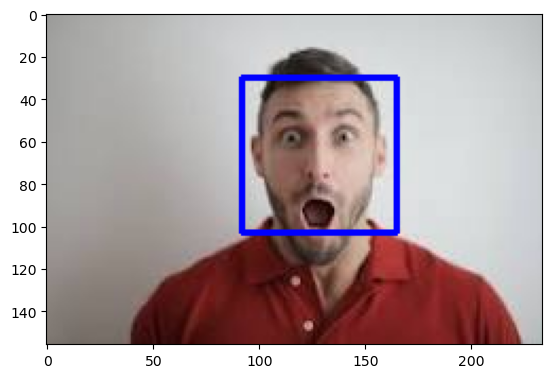

In [221]:
plt.imshow(cv2.cvtColor(test,cv2.COLOR_BGR2RGB))

In [222]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
#final_image=preprocessing.normalize(final_image)

In [223]:
Predictions=new_model.predict(final_image)

1/1 [==============================] - 0s 113ms/step


In [224]:
Predictions[0]

array([2.2438322e-05, 7.2444357e-07, 2.0596784e-02, 1.5316104e-05,
       2.0469961e-06, 4.2449628e-06, 9.7935838e-01], dtype=float32)

In [225]:
np.argmax(Predictions)

6

In [8]:
import cv2
cascPath=os.path.dirname(cv2.__file__)+"/data/haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cascPath)
cap=cv2.VideoCapture(0)
while(cap.isOpened()):
    success,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if(len(facess)==0):
            print("face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
                final_image=cv2.resize(face_roi,(224,224))
                final_image=np.expand_dims(final_image,axis=0)
                font=cv2.FONT_HERSHEY_SIMPLEX
                Predictions=new_model.predict(final_image)
                font_scale=1.5
                if(np.argmax(Predictions)==0):
                 emo="ANGRY"
                 x1,y1,w1,h1=0,0,175,175
                 cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                 cv2.putText(img,emo,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
                 cv2.putText(img,emo,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                 cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
                elif(np.argmax(Predictions)==1):
                 emo="DISGUST"
                 x1,y1,w1,h1=0,0,175,175
                 cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                 cv2.putText(img,emo,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
                 cv2.putText(img,emo,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                 cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
                if(np.argmax(Predictions)==2):
                 emo="FEAR"
                 x1,y1,w1,h1=0,0,175,175
                 cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                 cv2.putText(img,emo,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
                 cv2.putText(img,emo,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                 cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
                if(np.argmax(Predictions)==3):
                 emo="HAPPY"
                 x1,y1,w1,h1=0,0,175,175
                 cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                 cv2.putText(img,emo,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
                 cv2.putText(img,emo,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                 cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
                if(np.argmax(Predictions)==4):
                 emo="NEUTRAL"
                 x1,y1,w1,h1=0,0,175,175
                 cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                 cv2.putText(img,emo,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
                 cv2.putText(img,emo,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                 cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
                if(np.argmax(Predictions)==5):
                 emo="SAD"
                 x1,y1,w1,h1=0,0,175,175
                 cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                 cv2.putText(img,emo,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
                 cv2.putText(img,emo,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                 cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
                elif(np.argmax(Predictions)==6):
                 emo="SURPRISE"
                 x1,y1,w1,h1=0,0,175,175
                 cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                 cv2.putText(img,emo,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
                 cv2.putText(img,emo,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
                 cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
        cv2.imshow("Face Emotion Recognition",img)
        if(cv2.waitKey(2) & 0xFF==ord("q")):
            break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 67ms/step
face not detected
face not detected
1/1 [==============================] - 0s 61ms/step
face not detected
face not detected
face not detected
face not detected
1/1 [==============================] - 0s 66ms/step
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
1/1 [==============================] - 0s 54ms/step
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
1/1 [==============================] - 0s 67ms/step
face not detected
face not detected
1/1 [==============================] - 0s 49ms/step
face not detected
face not detected
1/1 [==============================] - 0s 51ms/step
face not detected
face not detected
face not detected
1/1 [==============================] - 0s 53ms/step
face not detected
face not

KeyboardInterrupt: 